# Usando a API - EOCube

O pacote EOCube permite que o usuário realize buscas por imagens de sensoriamento remoto com a criação de cubos de dados utilizando as matrizes indexadas com _Xarray_. Para isso o usuário necessita apenas de um código de acesso do projeto _BDC_ e selecionar alguns parâmetros como as coleções de dados baseadas nos conjuntos de imagens dos satélites, uma área de interesse em formato de limites em coordenadas de dois pontos no mapa denominado _Bounding Box_, as bandas espectrais como o infravermelho próximo ou espectros visíveis como azul, verde e vermelho, o período de tempo a partir de duas datas definindo uma linha temporal e por último se necessário um limite para quantidade de imagens no retorno da busca.

## Acessando dados de observação da Terra com a API - EOCubes

Para iniciar nosso estudo de caso precisando importar as bibliotecas necessárias como a `matplotlib` para visualizar os dados de forma gráfica e customizar a visualização das imagens.

Logo, importamos a biblioteca `DataCube` do pacote _EOCube_ juntamente com a biblioteca `info` para o retorno das informações do _STAC_ e a bibloteca `config` para configurar nossas variáveis de ambiente.

Como utilizaremos o serviço _STAC_ do Projeto _Brazil Data Cube - BDC_ não necessitamos alterar o `config.STAC_URL` para outros servidores.

Então vamos inserir o _token_ de acesso adquirido pelo _site_ de autenticação [_BDC Auth_](https://brazildatacube.dpi.inpe.br/auth/v1/auth/login) do projeto _BDC_.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from eocube import DataCube, info, config

config.ACCESS_TOKEN = "<seu_token>"

### Recuperando os metadados

Agora que importamos as bibliotecas necessárias podemos criar um cubo de dados para o estudo de caso.

Mas antes vamos recuperar as coleções de dados disponíveis para a criação do Cubo com o método `info.collections()`:

In [4]:
info.collections()

stac("https://brazildatacube.dpi.inpe.br/stac/")

Bom para fins de estudo utilizaremos apenas a coleção `CB4_64_16D_STK-1` pois possui as bandas espectrais necessárias para a exploração dos dados pelo pacote _EOCube_.

Então vamos recuperar os metadados referentes a esta coleção com o método `info.describe`:

In [5]:
info.describe("CB4_64_16D_STK-1")

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,1.0,255.0,0.0,1.0,uint8
CMASK,quality,0.0,4.0,255.0,1.0,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,1.0,int16
TOTALOB,TotalOb,1.0,255.0,0.0,1.0,uint8


### Criação do Cubo de Dados de Exemplo

Com esta reposta podemos visualizar os atributos necessários para a criação do cubo com a coleção selecionada, é possível criar cubos com várias coleções através no tempo, mas para este caso utilizaremos apenas a coleção do satélite _CBERS 4A_. Para compreender os filtros de dados, a seguir temos algumas definições:

#### Collection

Uma *collection* representa uma coleção de dados. Abaixo são listadas algumas coleções disponíveis no serviço do *Brazil Data Cube* e suas respectivas descrições, como exemplos:

- MOD13Q1-6: Terra Moderate Resolution Imaging Spectroradiometer (MODIS) Vegetation Indices (MOD13Q1) Version 6.  
    
- S2_MSI_L2_SR_LASRC-1: Sentinel-2 SR - LaSRC/Fmask 4.2. 
    
- CB4_64-1: CBERS-4 - AWFI - Cube Identity - v001.

#### Bounding Box

Um bbox representa uma área definida por duas longitudes e duas latitudes, onde:
    
- A latitude é um número decimal entre -90.0 e 90.0
    
- A longitude é um número decimal entre -180.0 e 180.0       

**Observação:** O formato segue o padrão: bbox = [min Longitude , min Latitude , max Longitude , max Latitude]. As coordenadas acima podem ser adquiridas utilizando a ferramenta _online_ para visualização dos cubos, o [Portal do Projeto _Brazil Data Cube_](http://brazildatacube.dpi.inpe.br/portal/explore).

#### Filtros de entrada

Para fins de teste utilizaremos os seguintes parâmetros:

 - **Collection**: CBERS-4 - AWFI - Cube Stack 16 days - v001;
 - **Bands**: Red, Green, Blue e NIR (Near Infra-red);
 - **Bounding Box**: -46.1425924, -23.0466003, -45.5534169, -23.4302733;
 - **Start Date**: 2018-01-01;
 - **Last Date**: 2021-01-01.
 
Para este primeiro estudo de caso utilizaremos uma área de estudo referente ao município de São José dos Campos.

Podemos conferir se estes atributos estão de acordo com a resposta retornada acima e com os filtros definidos vamos conferir a documentação para a biblioteca `DataCube`:

In [10]:
DataCube?

Com o retorno podemos verificar a colocação e a nomeclatura das variavéis e criar nosso cubo de dados de exemplo com base nesta informação:

In [11]:
%%time
eodatacube = DataCube(
    collections=["CB4_64_16D_STK-1"],
    query_bands=['red', 'green', 'blue', 'nir'],
    bbox=[-46.1425924, -23.0466003, -45.5534169, -23.4302733],
    start_date="2018-01-01",
    end_date="2021-01-01",
    limit=50
)

CPU times: user 194 ms, sys: 57.5 ms, total: 252 ms
Wall time: 5.03 s


### Operações com o Cubo de dados

Primeiramente, com o cubo de dados criado, podemos executar os métodos listados na documentação da biblioteca.

Vamos primeiro visualizar os dados adquiridos em forma de imagems em composição colorida.

Para este método é essencial a existência das bandas _Red_, _Green_ e _Blue_ para o cálculo da composição colorida da imagem, caso estas bandas não estejam na busca acarretará em um erro ou _Exception_.

Podemos visualizar qualquer uma das bandas selecionadas ou calcular os índices espectrais cujo cálculo possua as bandas selecionadas como na imagem a seguir:

<p align = "center">
  <img width="70%" src = "../source/assets/img/interact_plot.png">
</p>

O método `interactPlot` retorna uma visualização interativa para o `jupyter notebook`:

In [13]:
eodatacube.interactPlot("rgb") # "ndvi", "ndwi" ou qualquer outra banda selecionada

interactive(children=(Dropdown(description='date', options=(datetime.datetime(2018, 10, 16, 0, 0), datetime.da…

Podemos também visualizar uma banda em uma data específica para fins de amostragem.

Por exemplo, queremos visualizar a banda espectral _Near Infra Red - NIR_ na data de 21 de Agosto de 2020.

Para isso formatamos a data e selecionamos uma banda, mais uma vez vamos visualizar a documentação de um método, o `DataCube.search` que fará a busca na base de dados completa.

In [14]:
DataCube.search?

Com esta resposta podemos definir nossas variáveis.

In [17]:
nir = eodatacube.search(band="nir",time="2020-08-21")
nir

<xarray.DataArray ['ResultSearch_nir'] (time: 1, y: 633, x: 964)>
array([[[2549, 2582, 2430, ..., 2583, 2783, 2815],
        [2550, 2737, 2603, ..., 2578, 2918, 2953],
        [2677, 2898, 2844, ..., 2623, 2964, 3003],
        ...,
        [3102, 3049, 3114, ..., 2669, 2718, 2278],
        [3100, 3058, 3047, ..., 2772, 2761, 2623],
        [2839, 2791, 2783, ..., 2813, 2664, 2593]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-28
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 624 625 626 627 628 629 630 631 632
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 955 956 957 958 959 960 961 962 963
Attributes:
    CB4_64_16D_STK-1:  CBERS-4 - AWFI - Cube Stack 16 days - v001

Com esta resposta podemos visualizar a imagem de forma customizada

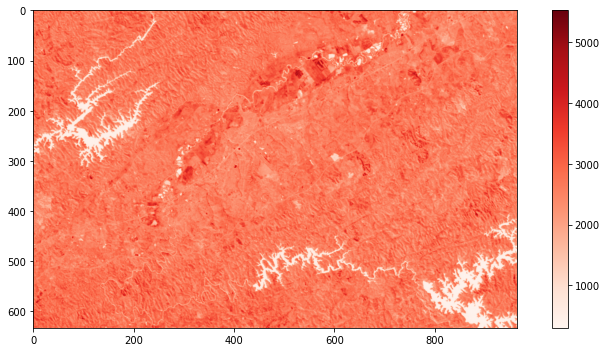

In [32]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    nir.values[0],
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

#### Geração de Índices Espectrais

- Os índices espectrais são uma importante ferramenta da área de sensoriamento remoto. 

- Os índices espectrais possibilitam identificar diferentes alvos em imagens de satélites. 

- Neste trabalho, foi implementado um módulo que permite o cálculo dos índices espectrais: NDVI, NDWI e NDBI.
    
- O objetivo é permitir que o usuário possa extrair informações desejadas, por meio do cálculo dos índices, a partir de matrizes de pixels das bandas.

- **O que é o NDVI?**

O Índice de Vegetação de Diferença Normalizada (NDVI) é um indicador da biomassa fotossinteticamente ativa. Consiste em um 
cálculo realizado por meio de bandas espectrais que tem como objetivo indicar a saúde da vegetação.

- **O que o NDVI possibilita?**

O NDVI ajuda a diferenciar a vegetação de outros tipos de cobertura da terra (como alvos não-naturais) e sua condição geral,
bem como identificar e classificar áreas cultivadas em mapas temáticos, auxiliando na detecção de mudanças em padrões.

- **Como o NDVI é calculado?**

O NDVI é calculado por meio da diferença entre a reflectância das bandas infravermelho próximo (NIR) e do vermelho (RED), 
dividida pela soma das duas reflectâncias, sendo expresso matematicamente como:
    
$NDVI = \frac{NIR - RED}{NIR + RED}$

Para geração dos índices espectrais (NDVI, NDWI e NDBI) foi construído um módulo, chamado spectral.py.
Este módulo contém as seguintes funções:
    
- **_ndvi(nir, red, cte_delta=1e-10)**
    
- **_ndwi(nir, green, cte_delta=1e-10)**
    
- **_ndbi(nir, swir1, cte_delta=1e-10)**
    
Uma constante foi criada para fazer uma adição no denominador de ambos os cálculos dos índices espectrais. Por padrão, esta constante foi definida com o valor de $1e-10$. Caso o usuário desejar, poderá alterar o valor da constante.

Podemos também visualizar os índices espectrais como NDVI, NDWI e NDBI de uma data específica.

In [20]:
ndvi = eodatacube.calculateNDVI("2020-08-21")
ndvi

<xarray.DataArray ['ImageNDVI'] (time: 1, y: 633, x: 964)>
array([[[0.69537745, 0.76125512, 0.77891654, ..., 0.40380435,
         0.47717622, 0.54035568],
        [0.70113409, 0.68534483, 0.69908616, ..., 0.42509674,
         0.57815035, 0.61985738],
        [0.6964512 , 0.58101473, 0.55282555, ..., 0.3900371 ,
         0.55468135, 0.63651226],
        ...,
        [0.79565847, 0.80788615, 0.81257276, ..., 0.38757473,
         0.45114789, 0.3776837 ],
        [0.79970972, 0.8083974 , 0.80562963, ..., 0.40141557,
         0.44592825, 0.40870032],
        [0.79286391, 0.80588806, 0.79028627, ..., 0.4164149 ,
         0.39439937, 0.39784367]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-08-28
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 624 625 626 627 628 629 630 631 632
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 955 956 957 958 959 960 961 962 963
Attributes:
    CB4_64_16D_STK-1:  CBERS-4 - AWFI - Cube Stack 16 days - v001

E mais uma vez podemos customizar a imagem em um plot em python.

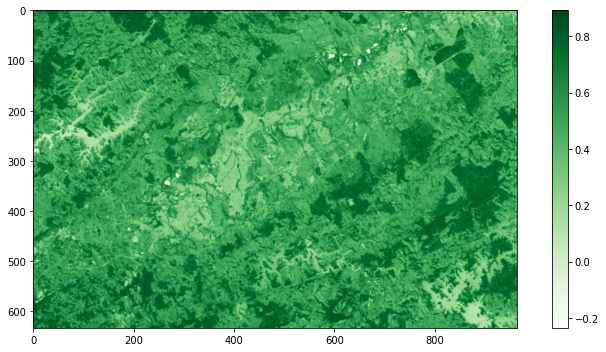

In [21]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(
    ndvi.values[0],
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

#### Séries temporais

Por meio de um cubo de dados podemos visualizar uma série temporal com base nas mudanças que um determinado ponto no mapa (na área de interesse) sofreu durante um certo período de tempo.

Para este método também é possivel visualizar a documentação para inferir um período de tempo customizado desde que se enquadre no período de tempo selecionado.

Há um exemplo de uso abaixo:

In [23]:
time_series = eodatacube.getTimeSeries(
    band='nir', lon=-45.7422561, lat=-23.2508317#, start_date="2020-01-01", end_date="2021-01-01"
)
time_series

<xarray.DataArray ['TimeSeries_NIR'] (time: 50)>
array([2972, 4007, 3721, 3540, 5045, 2043, 3164, 3745, 3283, 2029, 2899,
       3220, 2816, 2869, 1251, 2676, 2784, 2759, 2458, 3391, 2436, 2595,
       2759, 3398, 7836, 2856, 3462, 3306, 2889, 3311, 2960, 2957, 1536,
       1936, 3288, 2972, 2768, 2826, 3878, 3170, 2831, 2701, 2635, 2808,
       2873, 2858, 3984, 3990, 4060, 3945], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2018-10-16 2018-11-01 ... 2021-01-01
Attributes:
    longitude:  -45.7422561
    latitude:   -23.2508317

Com este dado recuperado podemos visualizar uma série temporal por meio de um gráfico usando a biblioteca `matplotlib`, conforme a seguir:

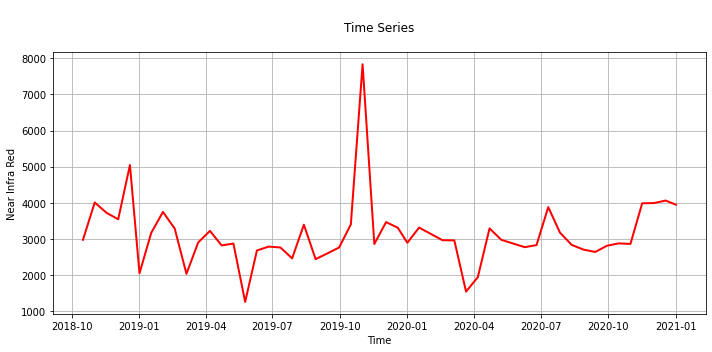

In [24]:
x = time_series.time
y = time_series

plt.figure(figsize=(10,5))
plt.title(f"\nTime Series\n")
plt.xlabel('Time')
plt.ylabel('Near Infra Red')
plt.plot(x, y, color="red", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

### Estudo de Caso na Área de Proteção Ambiental do Planalto Central - Brasília

Neste estudo de caso foi selecionada uma área onde houve incidência de queimadas no período do mês de agosto em 2019 na Área de Proteção Ambiental do Planalto a Central, localizado no Distrito Federal, Brasília. Os filtros criados para este estudo de caso são mostrados nos tópicos a seguir:

 - **Collection:** S2_10_16D_STK-1;
 - **Bands:** Red, Green, Blue e NIR (Near Infra-red);
 - **Bounding Box:** -47.9910, -15.9653, -47.9632, -15.9463;
 - **Start Date:** 2019-01-01;
 - **End Date:** 2019-01-01.

In [35]:
%%time
eocube_service = DataCube(
    collections=["S2_10_16D_STK-1"],
    query_bands=['red', 'green', 'blue', 'nir', 'ndvi'],
    bbox=[-47.9910,-15.9653,-47.9632,-15.9463],
    start_date="2019-01-01",
    end_date="2020-01-01",
    limit=50
)
eocube_service.interactPlot('rgb')

interactive(children=(Dropdown(description='date', options=(datetime.datetime(2019, 1, 1, 0, 0), datetime.date…

CPU times: user 578 ms, sys: 212 ms, total: 790 ms
Wall time: 4.89 s


Com o pacote *EOCube* é permitido calcular alguns índices espectrais como o NDVI para o município selecionado no dia 16 de agosto em 2018.

Com o pacote *EOCube* foi calculado o índice espectral NDVI para o município selecionado no dia 16 de agosto em 2018, conforme apresentado no plot abaixo. Com este índice é possível visualizar as áreas que apresentam maiores índices de vegetação e neste caso de uso, pode-se observar a área degradada pela queimada em duas datas diferentes para o mês de agosto de 2019.

CPU times: user 921 ms, sys: 34.2 ms, total: 955 ms
Wall time: 4.58 s


Text(0.5, 1.0, '2019-08-29 - NDVI')

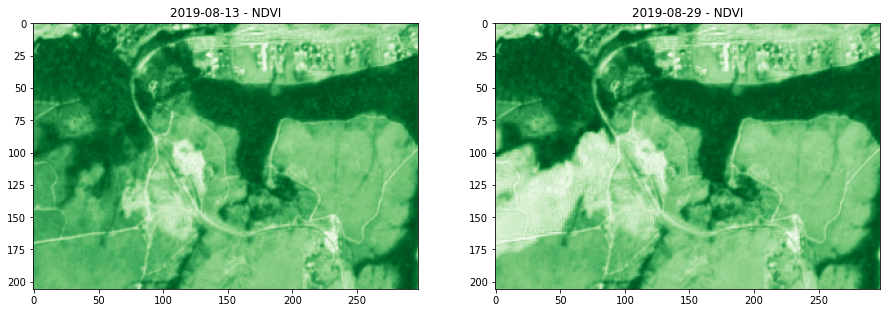

In [37]:
%%time
ndvi = eocube_service.search('ndvi')

loc1 = ndvi.loc['2019-08-13'].values
loc2 = ndvi.loc['2019-08-29'].values

plt.figure(figsize=(40, 10))
plt.subplot(151)
plt.imshow(loc1, cmap='Greens')
plt.title('2019-08-13 - NDVI')
plt.subplot(152)
plt.imshow(loc2, cmap='Greens')
plt.title('2019-08-29 - NDVI')

A série temporal gerada abaixo foi baseada em um ponto, com coordenadas -47.9886031 e -15.9533037, específico da imagem recuperada para o cálculo dos índices para o período selecionado.

É possível observar que no mês de agosto aconteceu uma queda considerável no valor de NDVI devido a degradação observada na figura anterior.

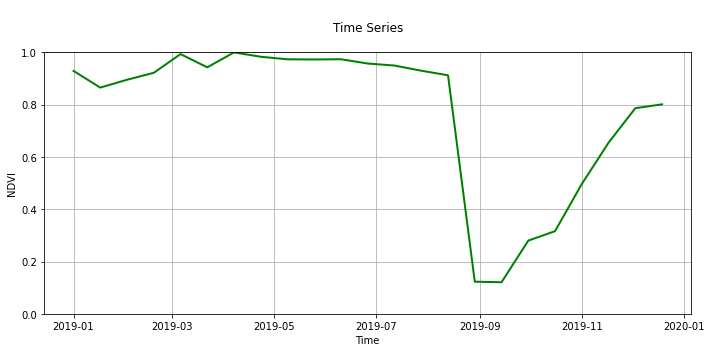

CPU times: user 1.57 s, sys: 247 ms, total: 1.81 s
Wall time: 3.77 s


In [39]:
%%time
ts = eocube_service.getTimeSeries(
    band='ndvi',
    lon=-47.9886031, lat= -15.9533037,
    start_date = "2019-01-01", end_date="2020-01-01"
)

x = ts.time.values
y = ts.values/ts.values.max()

plt.figure(figsize=(10,5))
plt.title(f"\nTime Series\n")
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.ylim([0,1])
plt.plot(x, y, color="green", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

## Conclusão

Por fim, cabe ressaltar que o projeto de desenvolvimento do pacote  *EOCube* apresentado, permite à comunidade científica o acesso, a recuperação e a visualização de dados de uso e cobertura da Terra.

Os estudos de caso apresentaram resultados satisfatórios em relação a proposta do pacote de criação de cubos de dados para áreas do território brasileiro, realizando a análise através do tempo. Como proposta para trabalhos futuros, as sugestões são aprimorar o pacote *EOCube* por meio do desenvolvimento de novas funcionalidades como a programação paralela e a estruturação dos dados.